In [5]:
from ipywidgets import widgets

%matplotlib inline

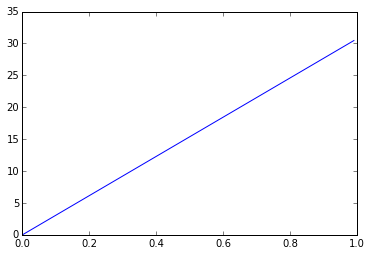

<function __main__.pltsin>

In [8]:
from IPython.html.widgets import *
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 1.0, 0.01)

def pltsin(f):
    plt.plot(t, (2*3.14*t*f))
    plt.show()

interact(pltsin, f=(1, 10, 0.1))

In [4]:
interact(pltsin, f=(1, 10, 0.1))

<function __main__.pltsin>

In [9]:
@interact(x=True, y=1.0)
def g(x, y):
    print(x, y)

True 0.4


In [36]:
def f(gold:widgets.FloatSlider(min=100, max=2000, description='Gold Spot Price ($US/Oz)')=1000,
      tungsten:(50, 500, 25)=340):
    print('Gold: {} W:{}'.format(gold, tungsten))

In [41]:
interact(f);

Gold: 334.8 W:340


<function __main__.f>

In [33]:
f(tungsten=2000)

Gold: 1000 W:2000


In [23]:
! pip install pivottablejs

In [26]:
from pivottablejs import pivot_ui
import pandas as pd

FullValue = 120

In [27]:
FractionReprocessed = pd.DataFrame({'Reprocessed':[1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3]})
FractionRecovered = pd.DataFrame({'Recovered':[1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3]})

#df = FractionRecovered.copy()
df = pd.DataFrame({'Reprocessed':np.zeros(0).astype(float),
                   'Recovered':np.zeros(0).astype(float),
                   'Value':np.zeros(0).astype(float)})

rowindex = 0

for i in FractionReprocessed['Reprocessed']:
    for j in FractionRecovered['Recovered']:
        df.loc[rowindex, 'Reprocessed'] = i
        df.loc[rowindex, 'Recovered'] = j
        df.loc[rowindex, 'Value'] = FullValue * i * j
        rowindex = rowindex + 1

print(df.head())

   Recovered  Reprocessed  Value
0        1.0            1    120
1        0.9            1    108
2        0.8            1     96
3        0.7            1     84
4        0.6            1     72


In [28]:
pivot_ui(df)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import interactive
from IPython.display import display

In [ ]:
import ipywidgets

In [ ]:
slider = ipywidgets.widgets.IntSlider(min=100, max=2000, step=100)
w = ipywidgets.widgets.interactive(slider)

<IPython.core.display.Javascript object>


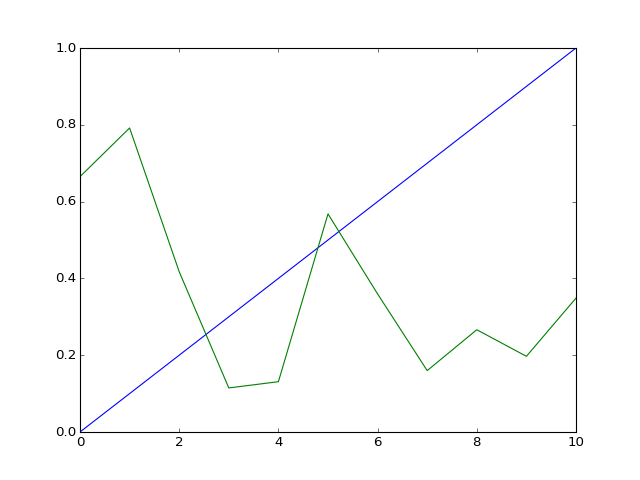

In [43]:
%matplotlib notebook
import matplotlib.pyplot as plt
from IPython.html.widgets import interact
import numpy as np

x = np.arange(0,11.)
y1 = x / 10.
y2 = np.random.rand(len(x))
fig, ax = plt.subplots()
ln1, = ax.plot(x,y1)
ln2, = ax.plot(x,y2)

ax.set_ylim([0,1])


def replot_it(a):
    y = (x/10.)**a
    ln2.set_ydata(y)
    ax.figure.canvas.draw()

In [ ]:
interact(replot_it, a=(0.,5.))

<IPython.core.display.Javascript object>


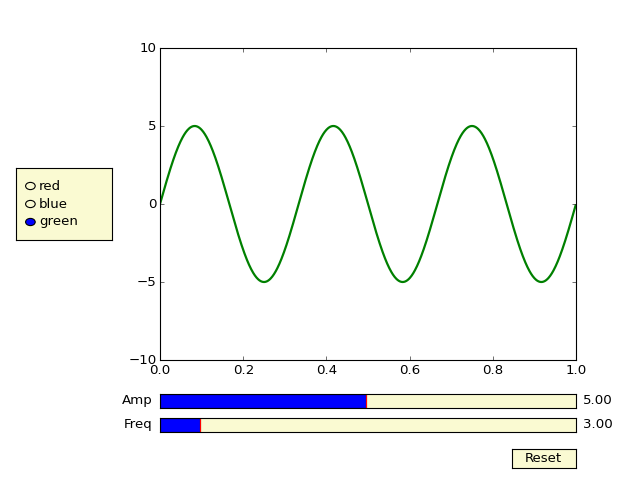

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
s = a0*np.sin(2*np.pi*f0*t)
l, = plt.plot(t, s, lw=2, color='red')
plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], axisbg=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], axisbg=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()
sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], axisbg=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()